## Data Introduction

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
jobs = pd.read_csv("../data/fullsample.csv")

In [6]:
jobs.shape

(7395885, 12)

In [8]:
jobs.count()

JOBID        7395885
STATE        7395885
BEGIN        7395885
END          7395885
REQMEM       7395885
USEDMEM      7395885
REQTIME      7395885
USEDTIME     7395885
NODES        7395885
CPUS         7395885
PARTITION    7395885
EXITCODE     7395885
dtype: int64

In [10]:
jobs.columns

Index(['JOBID', 'STATE', 'BEGIN', 'END', 'REQMEM', 'USEDMEM', 'REQTIME',
       'USEDTIME', 'NODES', 'CPUS', 'PARTITION', 'EXITCODE'],
      dtype='object')

In [12]:
jobs_clean = jobs[jobs['STATE'] != 'RUNNING']

In [16]:
jobs[jobs['STATE'] == 'RUNNING'].count()

JOBID        208
STATE        208
BEGIN        208
END          208
REQMEM       208
USEDMEM      208
REQTIME      208
USEDTIME     208
NODES        208
CPUS         208
PARTITION    208
EXITCODE     208
dtype: int64

In [18]:
jobs_clean.count()

JOBID        7395677
STATE        7395677
BEGIN        7395677
END          7395677
REQMEM       7395677
USEDMEM      7395677
REQTIME      7395677
USEDTIME     7395677
NODES        7395677
CPUS         7395677
PARTITION    7395677
EXITCODE     7395677
dtype: int64

In [20]:
jobs_clean['STATE'].value_counts()
#jobs['STATE'].value_counts()

STATE
COMPLETED              7375084
CANCELLED                 9055
FAILED                    3766
CANCELLED by 9201         1776
OUT_OF_MEMORY             1739
                        ...   
CANCELLED by 686562          1
CANCELLED by 891323          1
CANCELLED by 19853           1
CANCELLED by 494371          1
CANCELLED by 515423          1
Name: count, Length: 144, dtype: int64

In [22]:
jobs_cancelled = jobs[jobs['STATE'] == 'CANCELLED']
jobs_cancelled.shape

(9055, 12)

The **BEGIN** field indicates when the job was started (initiated on a computer node).

The **END** field indicates when the job ended (completed, failed, or was cancelled while running).

The **REQMEM** field is the amount of memory requested in megabytes. It can be per-core/CPU (Mc) or per-node (Mn).



In [ ]:
# Jobs where memory was requested per core.
jobs[jobs['REQMEM'].str[-2:] == 'Mc'].head()

In [ ]:
# Jobs where memory was requested per node.
jobs[jobs['REQMEM'].str[-2:] == 'Mn'].head()

The USEDMEM column is the amount of memory used in MB per node.

The requested time (REQTIME) and used time (USEDTIME) columns are in d-hh:mm:ss or hh:mm:ss for jobs less than one day in duration.

**NODES** is the number of servers used for the job. Most jobs are single node. For multiple node jobs, memory usage is the maximum over all nodes.

**CPUS** is the total number of CPU cores allocated to the job, and for multi-node jobs, this includes all nodes.

Most jobs are run in the "production" or "nogpfs" partition. The "debug" and "sam" partitions are test jobs that are expected to be short, and the "maxwell", "pascal", and "turing" partitions are for GPU resources.

In [ ]:
jobs['PARTITION'].value_counts()

The **EXITCODE** gives the [exit code](https://www.agileconnection.com/article/overview-linux-exit-codes) for the job, with "0:0" indicating a successful job. Exit codes have two numbers, where if the first number is non-zero, it indicates a problem on the server side and if the second is nonzero, it indicates a problem on the user side.

In [ ]:
jobs['EXITCODE'].value_counts()

In [ ]:
jobs[jobs['EXITCODE'] == '1:0']

In [ ]:
jobs[jobs['EXITCODE'] == '0:15']

In [24]:
jobs_completed = jobs[jobs['STATE'] == 'COMPLETED']

In [26]:
jobs_completed.shape

(7375084, 12)

In [28]:
jobs_completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7375084 entries, 1 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   STATE      object
 2   BEGIN      object
 3   END        object
 4   REQMEM     object
 5   USEDMEM    object
 6   REQTIME    object
 7   USEDTIME   object
 8   NODES      int64 
 9   CPUS       int64 
 10  PARTITION  object
 11  EXITCODE   object
dtypes: int64(2), object(10)
memory usage: 731.5+ MB


In [30]:
jobs_completed['END'].dtype

dtype('O')

In [ ]:
#df['Mycol'] = pd.to_datetime(df['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

In [32]:
jobs_completed['END']

1          2021-09-05T11:36:32
2          2021-09-05T19:04:53
3          2021-09-07T20:52:55
4          2021-09-10T16:45:24
5          2021-09-06T16:17:34
                  ...         
7395880    2020-10-31T23:40:46
7395881    2020-10-31T23:40:38
7395882    2020-10-31T23:49:43
7395883    2020-10-31T23:51:40
7395884    2020-10-31T23:59:57
Name: END, Length: 7375084, dtype: object

In [34]:
jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_21040\4105075721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2-00:00:00,00:01:46,1,1,sam,0:0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2-00:00:00,00:01:25,1,1,sam,0:0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,12:00:00,00:03:14,1,1,production,0:0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2-00:00:00,00:01:56,1,1,sam,0:0


In [560]:
testdf = jobs_completed.sample(5).reset_index()
testdf

,index,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,3562927,29187355_253,COMPLETED,2021-05-10T21:02:17,2021-05-10 22:34:43,1024Mn,9.80M,08:00:00,01:32:26,1,1,production,0:0
1,2357460,30285481,COMPLETED,2021-07-18T21:49:33,2021-07-19 00:22:26,87040Mn,34121.52M,10:00:00,02:32:53,1,8,production,0:0
2,5129497,27397200_135,COMPLETED,2021-02-19T21:00:49,2021-02-20 07:24:20,2048Mc,392.44M,4-00:00:00,10:23:31,1,1,production,0:0
3,6463980,25834157_1367,COMPLETED,2020-11-16T16:34:31,2020-11-16 16:34:51,8192Mn,0,8-08:00:00,00:00:20,1,1,production,0:0
4,5337963,26617804_242,COMPLETED,2021-01-01T05:04:08,2021-01-01 14:46:12,4096Mc,2209.27M,2-00:00:00,09:42:04,1,1,production,0:0


In [ ]:
for x in testdf['REQTIME']:
    try: 
        x = pd.to_datetime(x, format=('%d-%H:%M:%S'))
    except:
        x = pd.to_datetime(x, format=('%H:%M:%S'))
    print(x)
testdf

In [556]:
def timeconvert(x):
    try: 
        x = pd.to_datetime(x, format=('%d-%H:%M:%S'))
    except:
        x = pd.to_datetime(x, format=('%H:%M:%S'))
    return x

In [562]:
#df['new_column'] = [your_func(x) for x in df['column']]
testdf['REQTIME'] = [timeconvert(x) for x in testdf['REQTIME']]
testdf

,index,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,3562927,29187355_253,COMPLETED,2021-05-10T21:02:17,2021-05-10 22:34:43,1024Mn,9.80M,1900-01-01 08:00:00,01:32:26,1,1,production,0:0
1,2357460,30285481,COMPLETED,2021-07-18T21:49:33,2021-07-19 00:22:26,87040Mn,34121.52M,1900-01-01 10:00:00,02:32:53,1,8,production,0:0
2,5129497,27397200_135,COMPLETED,2021-02-19T21:00:49,2021-02-20 07:24:20,2048Mc,392.44M,1900-01-04 00:00:00,10:23:31,1,1,production,0:0
3,6463980,25834157_1367,COMPLETED,2020-11-16T16:34:31,2020-11-16 16:34:51,8192Mn,0,1900-01-08 08:00:00,00:00:20,1,1,production,0:0
4,5337963,26617804_242,COMPLETED,2021-01-01T05:04:08,2021-01-01 14:46:12,4096Mc,2209.27M,1900-01-02 00:00:00,09:42:04,1,1,production,0:0


In [310]:
jobs_completed = jobs_completed.sort_values('END')
jobs_completed

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
6640577,24460577,COMPLETED,2020-10-01T00:05:55,2020-10-01 00:10:15,4096Mc,868.77M,12:00:00,00:04:20,1,1,production,0:0
6640635,24460647,COMPLETED,2020-10-01T00:10:38,2020-10-01 00:12:58,2000Mn,0.09M,2-00:00:00,00:02:20,1,1,sam,0:0
6640627,24460639,COMPLETED,2020-10-01T00:11:22,2020-10-01 00:13:31,1024Mc,221.10M,00:30:00,00:02:09,1,1,production,0:0
6640651,24460668,COMPLETED,2020-10-01T00:15:16,2020-10-01 00:17:23,2000Mn,0.09M,2-00:00:00,00:02:07,1,1,sam,0:0
6640654,24460671,COMPLETED,2020-10-01T00:17:08,2020-10-01 00:17:53,1024Mc,636.96M,00:30:00,00:00:45,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
927386,32923987,COMPLETED,2021-10-07T20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0
927387,32923988,COMPLETED,2021-10-07T20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0
927388,32923989,COMPLETED,2021-10-07T20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0
1491977,32923996,COMPLETED,2021-10-07T20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0


In [316]:
print(jobs_completed['END'].min())
print(jobs_completed['END'].max())

2020-10-01 00:10:15
2021-10-07 20:41:11


In [36]:
jobs_completed['END'].value_counts(sort=False)

END
2021-09-05 11:36:32    2
2021-09-05 19:04:53    1
2021-09-07 20:52:55    1
2021-09-10 16:45:24    1
2021-09-06 16:17:34    1
                      ..
2020-10-31 23:53:21    1
2020-10-31 23:21:34    1
2020-10-31 23:38:46    1
2020-10-31 23:40:38    1
2020-10-31 23:49:43    1
Name: count, Length: 4100858, dtype: int64

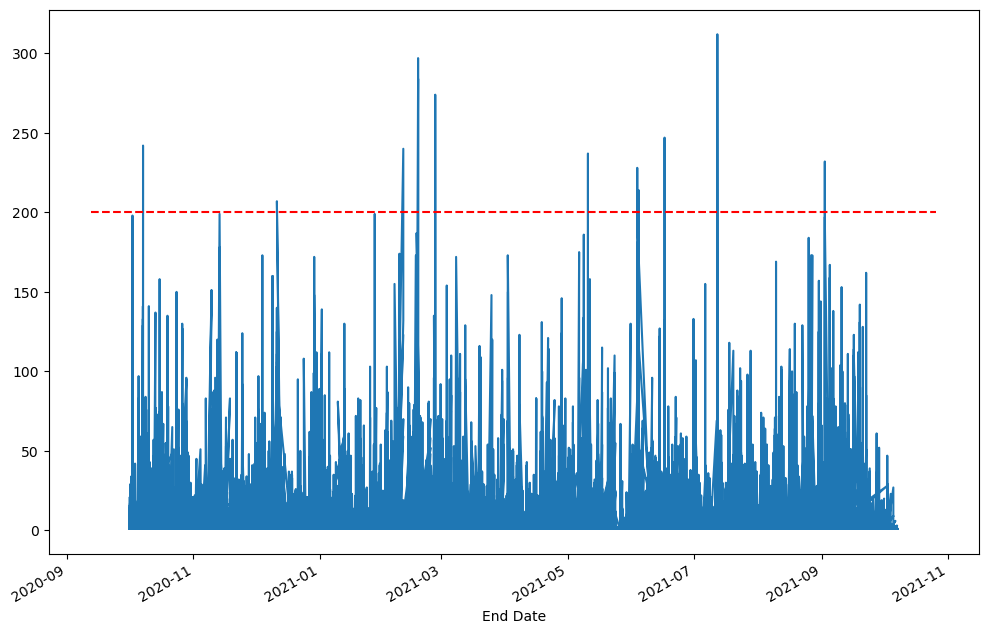

In [58]:
plt.figure(figsize = (12,8))
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')
xmin, xmax = plt.xlim()
plt.hlines(y = 200, xmin=xmin, xmax=xmax, color = 'red', linestyle = 'dashed')

<Axes: xlabel='END'>

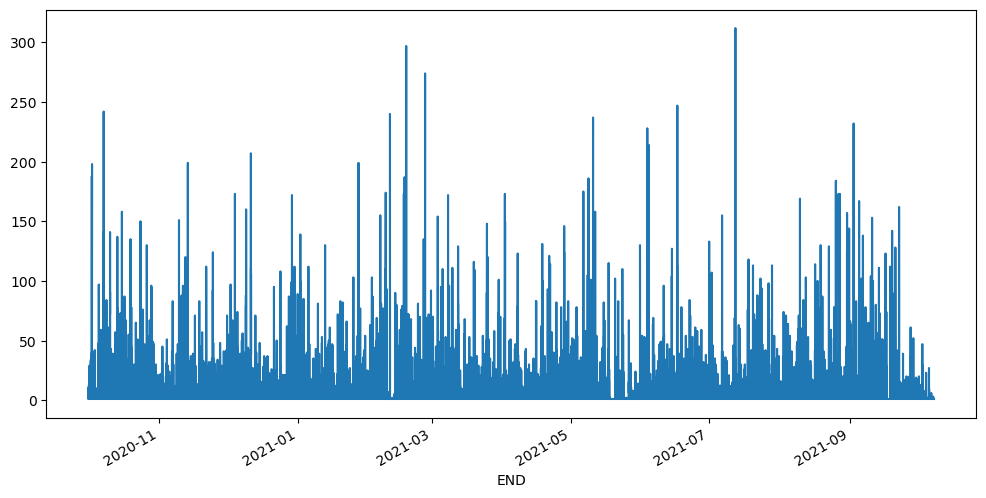

In [266]:
plt.figure(figsize = (12,6))
jobs_completed['END'].value_counts().sort_index().plot()
#xmin, xmax = plt.xlim()
#plt.hlines(y = 200, xmin=xmin, xmax=xmax, color = 'red', linestyle = 'dashed')

In [270]:
jobs_completed['END'].value_counts(sort=False).loc[lambda x : x >= 150]

END
2021-09-02 11:15:15    232
2021-09-02 11:15:14    197
2021-09-04 21:25:04    161
2021-09-04 21:25:03    167
2021-09-04 21:25:02    159
2021-09-10 14:19:07    150
2021-09-10 14:19:06    153
2021-09-22 11:19:56    162
2021-08-25 15:55:49    184
2021-08-26 20:13:35    173
2021-08-27 10:08:49    173
2021-08-30 14:07:14    157
2021-08-09 21:02:50    169
2021-07-06 14:42:30    155
2021-07-12 11:36:02    312
2021-06-03 17:31:18    228
2021-06-03 17:31:26    193
2021-06-03 17:31:28    181
2021-06-04 09:37:19    214
2021-06-16 22:34:57    247
2021-05-06 14:38:57    175
2021-05-08 20:41:35    151
2021-05-08 20:41:34    186
2021-05-10 20:55:21    195
2021-05-10 20:55:20    237
2021-05-11 19:13:10    158
2021-04-02 02:00:19    173
2021-04-02 04:24:35    150
2021-03-08 02:10:43    172
2021-03-03 13:35:05    154
2021-02-10 13:04:28    240
2021-02-06 07:04:04    155
2021-02-08 16:04:14    174
2021-02-17 16:45:58    297
2021-02-16 15:45:34    173
2021-02-16 23:20:36    187
2021-02-17 16:45:57    2

The slurm_wrapper_ce5.log and slurm_wrapper_ce6.log files contain logs of jobs submitted from the Open Science Grid.

In [80]:
ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  names=['timestamp', 'user', 'code', 'responsetime', 'return_code', 'command'],
                  delimiter=' - ',
                  engine='python',)

ce5.head()

,timestamp,user,code,responsetime,return_code,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [82]:
ce5.shape

(4770893, 6)

For this project, we are interested in jobs from user 9204 (the test user) where the command starts with '/usr/bin/sbatch', the returncode is non-zero and the time is greater than 15. These conditions indicate that the scheduler became unresponsive at that point in time.

In [84]:
ce5_user9204 = ce5.loc[(ce5['user'] == 'user 9204') & (ce5['return_code'] != 'returncode 0')].reset_index()
ce5_user9204

,index,timestamp,user,code,responsetime,return_code,command
0,564,2020-10-16 08:59:38.926896,user 9204,retry 0,time 0.1231698989868164,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,565,2020-10-16 08:59:38.986336,user 9204,retry 1,time 0.05905652046203613,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,566,2020-10-16 08:59:39.133897,user 9204,retry 2,time 0.1472628116607666,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,683,2020-10-16 09:11:17.798315,user 9204,retry 0,time 0.02103400230407715,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,684,2020-10-16 09:11:17.817819,user 9204,retry 1,time 0.019124746322631836,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...,...
29425,4729891,2021-10-02 16:01:42.684681,user 9204,retry 0,time 21.28179407119751,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
29426,4730187,2021-10-02 16:34:51.632533,user 9204,retry 0,time 20.060213804244995,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
29427,4730701,2021-10-02 17:33:19.126956,user 9204,retry 0,time 20.50884461402893,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
29428,4730705,2021-10-02 17:33:39.156362,user 9204,retry 1,time 20.028889894485474,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [88]:
ce5_user9204['responsetime'] = ce5_user9204['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)
ce5_user9204['responsetime']

0         0.123170
1         0.059057
2         0.147263
3         0.021034
4         0.019125
           ...    
29425    21.281794
29426    20.060214
29427    20.508845
29428    20.028890
29429    20.043146
Name: responsetime, Length: 29430, dtype: float64

In [90]:
ce5_user9204.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29430 entries, 0 to 29429
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         29430 non-null  int64  
 1   timestamp     29430 non-null  object 
 2   user          29430 non-null  object 
 3   code          29430 non-null  object 
 4   responsetime  29430 non-null  float64
 5   return_code   29430 non-null  object 
 6   command       29430 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In [308]:
for x in ce5_user9204['command']:
    x.find("command['usr/bin/sbatch")
x

"command ['/usr/bin/sbatch', '/tmp/condor_g_scratch.0x5556727577c0.1189023/bl_g77bis']"

In [302]:
#mask = df.apply(lambda x: x.str.contains(r'\^', na=False))
#ce5_user9204_batch = ce5_user9204['command'].apply(lambda x : x.str.contains(r"\command['usr/bin/sbatch"))
#ce5_user9204_batch = ce5_user9204.loc[ce5_user9204['command'].str.contains("command\\['usr/bin/sbatch")]
#ce5_user9204_batch
ce5_user9204['command'].str.contains("command['usr/bin/sbatch", regex=False)

0        False
1        False
2        False
3        False
4        False
         ...  
29425    False
29426    False
29427    False
29428    False
29429    False
Name: command, Length: 29430, dtype: bool

In [304]:
ce5_user9204

,index,timestamp,user,code,responsetime,return_code,command
0,564,2020-10-16 08:59:38.926896,user 9204,retry 0,0.123170,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,565,2020-10-16 08:59:38.986336,user 9204,retry 1,0.059057,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,566,2020-10-16 08:59:39.133897,user 9204,retry 2,0.147263,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,683,2020-10-16 09:11:17.798315,user 9204,retry 0,0.021034,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,684,2020-10-16 09:11:17.817819,user 9204,retry 1,0.019125,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...,...
29425,4729891,2021-10-02 16:01:42.684681,user 9204,retry 0,21.281794,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
29426,4730187,2021-10-02 16:34:51.632533,user 9204,retry 0,20.060214,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
29427,4730701,2021-10-02 17:33:19.126956,user 9204,retry 0,20.508845,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
29428,4730705,2021-10-02 17:33:39.156362,user 9204,retry 1,20.028890,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [104]:
ce5_user9204_test = ce5_user9204.loc[(ce5_user9204['responsetime'] >= 15)].reset_index()

In [110]:
ce5_user9204_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       5558 non-null   int64  
 1   index         5558 non-null   int64  
 2   timestamp     5558 non-null   object 
 3   user          5558 non-null   object 
 4   code          5558 non-null   object 
 5   responsetime  5558 non-null   float64
 6   return_code   5558 non-null   object 
 7   command       5558 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 347.5+ KB


In [132]:
ce5_user9204_test['timestamp'] = pd.to_datetime(ce5_user9204_test['timestamp']).apply(lambda x: x.replace(microsecond=0))
ce5_user9204_test['timestamp']

0      2020-10-16 22:25:53
1      2020-10-16 22:31:02
2      2020-10-16 22:31:22
3      2020-10-16 22:37:48
4      2020-10-16 22:44:57
               ...        
5553   2021-10-02 16:01:42
5554   2021-10-02 16:34:51
5555   2021-10-02 17:33:19
5556   2021-10-02 17:33:39
5557   2021-10-02 18:29:08
Name: timestamp, Length: 5558, dtype: datetime64[ns]

<Axes: xlabel='timestamp'>

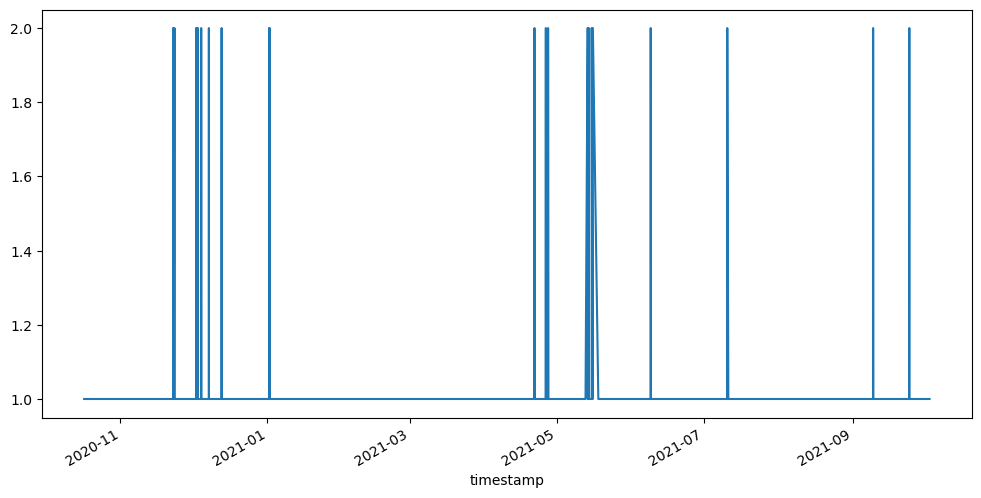

In [134]:
plt.figure(figsize = (12,6))
ce5_user9204_test['timestamp'].value_counts().sort_index().plot()

In [162]:
jobs_completed['END'].value_counts().loc[lambda x : x >= 200].sort_index()

END
2020-10-07 15:03:10    242
2020-12-11 09:02:40    207
2021-02-10 13:04:28    240
2021-02-17 16:45:57    284
2021-02-17 16:45:58    297
2021-02-25 23:56:42    274
2021-05-10 20:55:20    237
2021-06-03 17:31:18    228
2021-06-04 09:37:19    214
2021-06-16 22:34:57    247
2021-07-12 11:36:02    312
2021-09-02 11:15:15    232
Name: count, dtype: int64

In [144]:
ce5_user9204_test['timestamp'].value_counts(sort=False).loc[lambda x: x >=2]

timestamp
2020-11-22 20:11:38    2
2020-11-22 20:11:58    2
2020-11-23 10:09:21    2
2020-12-02 09:50:50    2
2020-12-02 09:51:31    2
2020-12-02 09:51:50    2
2020-12-02 16:54:49    2
2020-12-03 03:02:05    2
2020-12-04 12:24:06    2
2020-12-04 12:24:44    2
2020-12-04 12:26:09    2
2020-12-04 12:27:47    2
2020-12-04 12:28:07    2
2020-12-04 12:28:27    2
2020-12-07 16:57:00    2
2020-12-12 23:56:52    2
2021-01-01 16:51:29    2
2021-01-01 20:53:59    2
2021-01-01 20:54:19    2
2021-04-21 19:16:02    2
2021-04-26 12:45:57    2
2021-04-27 11:10:03    2
2021-05-13 20:59:18    2
2021-05-13 20:59:54    2
2021-05-13 21:00:29    2
2021-05-13 23:43:11    2
2021-05-14 01:43:35    2
2021-05-14 03:29:37    2
2021-05-14 03:29:57    2
2021-05-14 06:27:56    2
2021-05-15 13:19:31    2
2021-05-16 01:13:11    2
2021-05-16 01:13:46    2
2021-06-09 01:15:32    2
2021-07-10 19:44:50    2
2021-09-09 08:15:41    2
2021-09-24 08:44:48    2
Name: count, dtype: int64

In [184]:
ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log',
                  header=None,
                  names=['timestamp', 'user', 'code', 'responsetime', 'return_code', 'command'],
                  delimiter=' - ',
                  engine='python',)

ce6.head()

,timestamp,user,code,responsetime,return_code,command
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [188]:
ce6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776520 entries, 0 to 4776519
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   timestamp     object
 1   user          object
 2   code          object
 3   responsetime  object
 4   return_code   object
 5   command       object
dtypes: object(6)
memory usage: 218.7+ MB


In [190]:
ce6_user9204 = ce6.loc[(ce5['user'] == 'user 9204') & (ce6['return_code'] != 'returncode 0')].reset_index()
ce6_user9204

,index,timestamp,user,code,responsetime,return_code,command
0,2162,2020-10-16 13:11:28.041345,user 9202,retry 2,time 0.2604215145111084,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,11349,2020-10-16 22:39:57.846021,user 9201,retry 0,time 20.036171197891235,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
2,11363,2020-10-16 22:40:24.993364,user 9201,retry 1,time 20.047770023345947,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
3,11481,2020-10-16 22:45:04.414960,user 9201,retry 0,time 20.025500059127808,returncode 1,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
4,38747,2020-10-18 07:32:15.661126,user 9219,retry 0,time 20.23547625541687,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job']"
...,...,...,...,...,...,...,...
17551,4766824,2021-10-06 15:39:17.130518,user 9201,retry 1,time 38.090365409851074,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
17552,4766840,2021-10-06 15:39:18.896666,user 9201,retry 1,time 38.03921818733215,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
17553,4766844,2021-10-06 15:39:19.191201,user 9201,retry 1,time 38.04861330986023,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
17554,4766845,2021-10-06 15:39:19.250733,user 9201,retry 1,time 38.041404724121094,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."


In [192]:
ce6_user9204['responsetime'] = ce6_user9204['responsetime'].str.replace(r'\w+\s', '', regex=True).astype(float)
ce6_user9204['responsetime']

0         0.260422
1        20.036171
2        20.047770
3        20.025500
4        20.235476
           ...    
17551    38.090365
17552    38.039218
17553    38.048613
17554    38.041405
17555    38.054902
Name: responsetime, Length: 17556, dtype: float64

In [194]:
ce6_user9204_test = ce6_user9204.loc[(ce6_user9204['responsetime'] >= 15)].reset_index()

In [196]:
ce6_user9204_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       16751 non-null  int64  
 1   index         16751 non-null  int64  
 2   timestamp     16751 non-null  object 
 3   user          16751 non-null  object 
 4   code          16751 non-null  object 
 5   responsetime  16751 non-null  float64
 6   return_code   16751 non-null  object 
 7   command       16751 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [198]:
ce6_user9204_test['timestamp'] = pd.to_datetime(ce6_user9204_test['timestamp']).apply(lambda x: x.replace(microsecond=0))
ce6_user9204_test['timestamp']

0       2020-10-16 22:39:57
1       2020-10-16 22:40:24
2       2020-10-16 22:45:04
3       2020-10-18 07:32:15
4       2020-10-18 08:52:31
                ...        
16746   2021-10-06 15:39:17
16747   2021-10-06 15:39:18
16748   2021-10-06 15:39:19
16749   2021-10-06 15:39:19
16750   2021-10-06 15:39:19
Name: timestamp, Length: 16751, dtype: datetime64[ns]

<Axes: xlabel='End Date'>

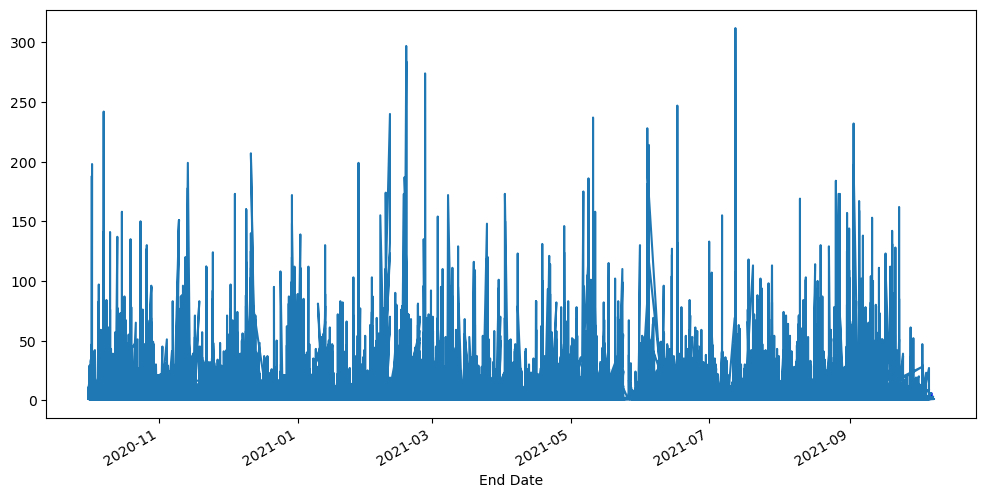

In [264]:
plt.figure(figsize = (12,6))
ce6_user9204_test['timestamp'].value_counts().sort_index().plot()
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')

In [260]:
jobs_completed['END'].value_counts().loc[lambda x : x >= 200].sort_index()

END
2020-10-07 15:03:10    242
2020-12-11 09:02:40    207
2021-02-10 13:04:28    240
2021-02-17 16:45:57    284
2021-02-17 16:45:58    297
2021-02-25 23:56:42    274
2021-05-10 20:55:20    237
2021-06-03 17:31:18    228
2021-06-04 09:37:19    214
2021-06-16 22:34:57    247
2021-07-12 11:36:02    312
2021-09-02 11:15:15    232
Name: count, dtype: int64

In [204]:
ce6_user9204_test['timestamp'].value_counts(sort=False).loc[lambda x: x >=15]

timestamp
2020-12-02 10:08:32    23
2020-12-04 13:13:24    16
2020-12-04 20:13:59    15
2020-12-07 14:07:11    15
2020-12-19 01:00:50    16
2021-04-15 14:27:50    18
Name: count, dtype: int64